# Melanoma Detection Assignment

Godwin Paul Vincent

## Problem Statement
The objective is to construct a CNN-based model capable of accurately identifying melanoma, a potentially fatal form of cancer that necessitates early detection. Melanoma accounts for 75% of skin cancer-related fatalities. An automated system capable of analyzing images and notifying dermatologists about potential melanoma cases holds the potential to significantly reduce the manual effort required for diagnosis.

### DataSet
The dataset comprises 2,357 images representing both malignant and benign oncological conditions, sourced from the International Skin Imaging Collaboration (ISIC). These images were categorized according to ISIC classifications, with each subset containing an approximately equal number of images, except for melanomas and moles, which have a slight prevalence.

The dataset encompasses the following skin conditions:

* Actinic keratosis
* Basal cell carcinoma
* Dermatofibroma
* Melanoma
* Nevus
* Pigmented benign keratosis
* Seborrheic keratosis
* Squamous cell carcinoma
* Vascular lesion

### Project Pipeline:

-   **Data Setup:**
    
    -   Read and Understand the Data
    -   Define Paths for Train and Test Images
-   **Dataset Preparation:**
    
    -   Create Train and Validation Datasets from the Train Directory (Batch Size: 32)
    -   Resize Images to 180x180
-   **Dataset Visualization:**
    
    -   Develop Code to Visualize One Instance of Each of the Nine Classes
-   **Initial Model Training:**
    
    -   Build a CNN Model to Detect Nine Classes
    -   Rescale Images to Normalize Pixel Values (0-1)
    -   Choose Optimizer and Loss Function
    -   Train the Model for ~20 Epochs
    -   Analyze Model Fit Results (Check for Overfitting/Underfitting)
-   **Data Augmentation:**
    
    -   Implement Data Augmentation Strategies to Address Overfitting/Underfitting
-   **Model Training on Augmented Data:**
    
    -   Build and Train a CNN Model on Augmented Data
    -   Rescale Images (0-1)
    -   Use Appropriate Optimizer and Loss Function
    -   Train the Model for ~20 Epochs
    -   Evaluate Model Performance and Resolution of Earlier Issues
-   **Class Distribution Analysis:**
    
    -   Examine Current Class Distribution in the Training Dataset
    -   Identify Classes with the Fewest Samples
    -   Determine Dominant Classes in Terms of Sample Proportions
-   **Handling Class Imbalances:**
    
    -   Address Class Imbalances Using the Augmentor Library
-   **Model Training on Balanced Data:**
    
    -   Create and Train a CNN Model on Balanced Data
    -   Rescale Images (0-1)
    -   Utilize Suitable Optimizer and Loss Function
    -   Train the Model for ~30 Epochs
    -   Evaluate Model Performance and Determine Resolution of Issues






### Importing Skin Cancer Data


### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Data Setup:
### Mount Google Drive

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


#### Extract the zip file content

In [3]:
import zipfile

zip_file_path = '/content/gdrive/My Drive/colab/CNN_assignment.zip'
extract_path = '/content/gdrive/My Drive/colab'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Dataset Preparation:
### Defining the path for train and test images

In [50]:

## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/colab/skin/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/colab/skin/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb',
                                                             subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# Loading the testing data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb')

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Dataset Visualization:
### Visualize the data
#### Visualize one instance of all the nine classes present in the dataset

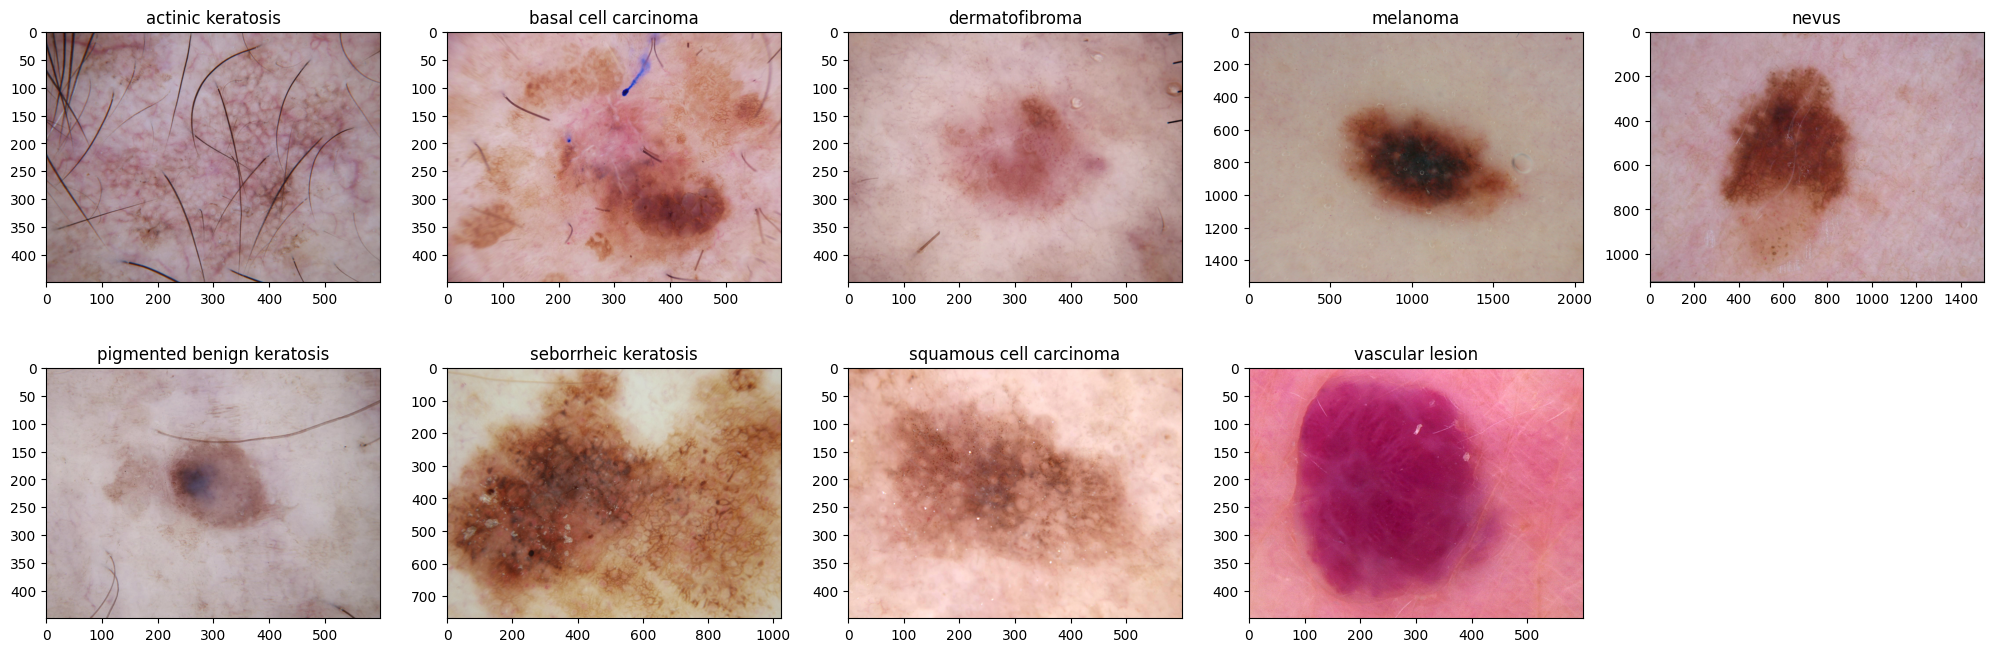

In [11]:
import matplotlib.pyplot as plt

### use training  data to visualize

plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(2,5,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Initial Model Building & training

### Create the model
#### Steps:

*  Create a CNN model, which can accurately detect 9 classes present in the dataset.
* Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1).
* The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
# CNN Model
model= Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

### Compile the model
Choose Adam optimiser and SparseCategoricalCrossEntropy loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 259200)            0

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 729s 3s/step - loss: 3.2694 - accuracy: 0.2539 - val_loss: 1.8369 - val_accuracy: 0.3333
Epoch 2/20
56/56 [==============================] - 4s 68ms/step - loss: 1.7210 - accuracy: 0.3856 - val_loss: 1.5947 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 4s 69ms/step - loss: 1.5185 - accuracy: 0.4699 - val_loss: 1.6796 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 4s 67ms/step - loss: 1.4271 - accuracy: 0.5156 - val_loss: 1.3574 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 4s 67ms/step - loss: 1.2744 - accuracy: 0.5597 - val_loss: 1.4628 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 4s 69ms/step - loss: 1.1995 - accuracy: 0.5737 - val_loss: 1.4394 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 4s 67ms/step - loss: 1.0878 - accuracy: 0.6205 - val_loss: 1.4594 - val_accuracy: 0.5369
Epoch 8/20
56

### Visualizing training results

#### Reusable function to plot the model metrics

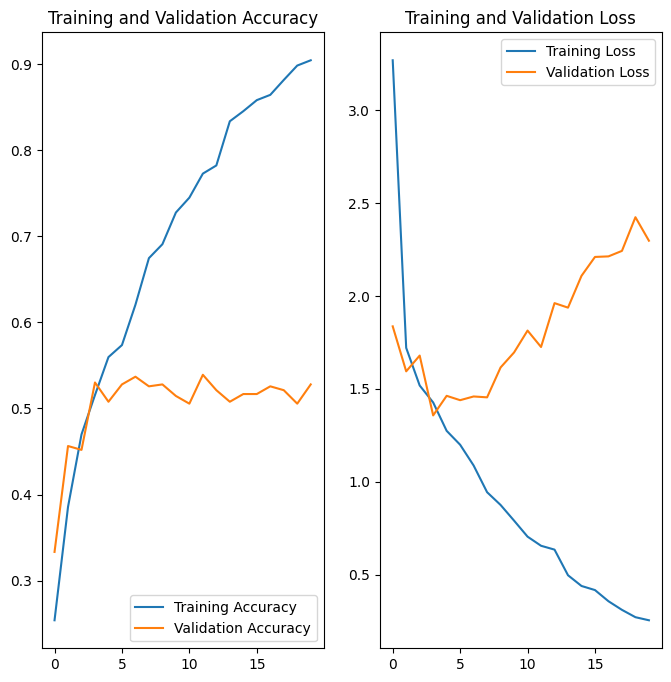

In [17]:
def ViewModelMetrics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

ViewModelMetrics(history)



#### **Findings from the analysis are as follows:**


*   Training accuracy increases linearly with time, while validation accuracy remains stuck at 50% during training.
* The training loss decreases with epochs, but the validation loss increases.
* The plots illustrate a significant gap between training and validation accuracy, with the model reaching approximately 50% accuracy on the validation set.
* A noticeable difference in accuracy between training and validation data suggests **overfitting**.





## Data augmentation

### Chose an appropriate data augmentation strategy to resolve underfitting/overfitting

* We notice overfitting and this is typically a concern when dealing with a limited number of training instances.

* Data augmentation involves the generation of extra training data by applying random transformations to the existing examples, resulting in realistic-looking images.

* This approach aims to increase the model's exposure to various facets of the data, facilitating improved generalization.

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

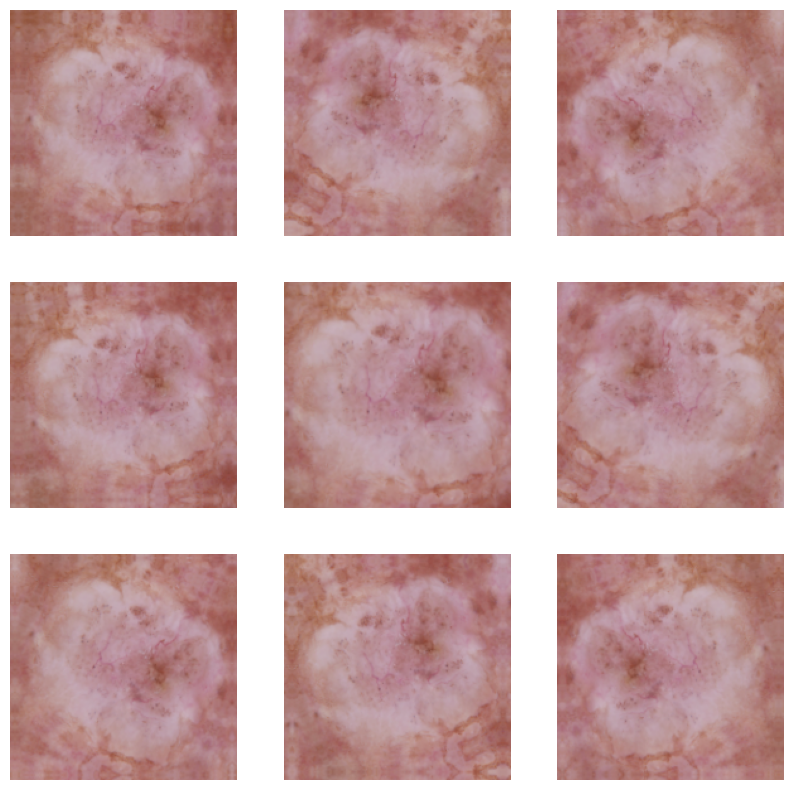

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


### Create the model with Data Augmentation and Dropout layer, compile and train the model


# Model on the augmented data with dropout :

* Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
* Choosing an appropriate optimiser and loss function for model training
* Training the model for ~20 epochs
* Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.


> Use Data augemntation + Dropout Layer



In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

# CNN Model
model= Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))


### Compiling the model

In [21]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

### Training the model

In [22]:
## train model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 9s 113ms/step - loss: 2.8927 - accuracy: 0.1953 - val_loss: 1.9321 - val_accuracy: 0.2595
Epoch 2/20
56/56 [==============================] - 6s 110ms/step - loss: 1.8338 - accuracy: 0.3237 - val_loss: 1.6718 - val_accuracy: 0.4251
Epoch 3/20
56/56 [==============================] - 6s 109ms/step - loss: 1.6498 - accuracy: 0.4219 - val_loss: 1.4737 - val_accuracy: 0.4586
Epoch 4/20
56/56 [==============================] - 6s 111ms/step - loss: 1.4856 - accuracy: 0.4877 - val_loss: 1.4998 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 6s 109ms/step - loss: 1.4669 - accuracy: 0.4704 - val_loss: 1.4324 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 6s 107ms/step - loss: 1.3940 - accuracy: 0.5061 - val_loss: 1.3797 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 6s 110ms/step - loss: 1.3662 - accuracy: 0.5167 - val_loss: 1.4710 - val_accuracy: 0.5101
Epoch 

### Visualizing the results

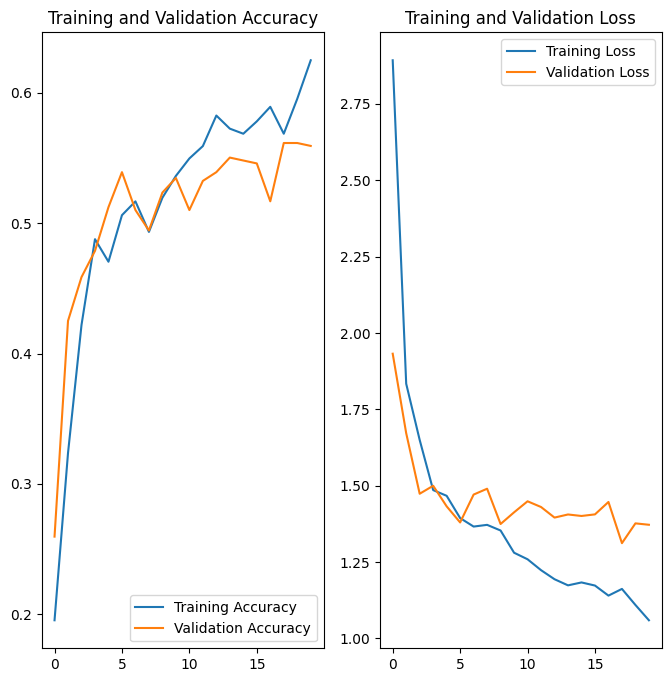

In [24]:
ViewModelMetrics(history)

#### Findings Analysis:

* Training accuracy rises steadily over time, while validation accuracy increases but levels off at 55% during training.
* Training loss decreases as epochs progress, and **so does validation loss**.
* The plots reveal that the gap between training and validation accuracy has reduced compared to the previous model, with the model achieving approximately 55% accuracy on the validation set.
* **The disparity in accuracy between training and validation is minimal**.



---

#### It's evident that the model's **overfitting has significantly decreased** compared to previous model.

---



## **Class Distribution:**

#### Find the distribution of classes in the training dataset.
#### **Context:**

* Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others.
* Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


#### **Class Imbalance Finding:**
#### - Which class has the least number of samples?


> **seborrheic keratosis** 77 samples


#### - Which classes dominate the data in terms proportionate number of samples?


> **pigmented benign keratosis**   462 samples




## Handling class imbalances
###  Rectify the Class imbalance
#### **Context:** We can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [31]:
path_to_training_dataset = data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/colab/skin/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DED68130970>: 100%|██████████| 500/500 [00:17<00:00, 27.93 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/colab/skin/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DED68454F10>: 100%|██████████| 500/500 [00:20<00:00, 24.58 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/colab/skin/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DED68454850>: 100%|██████████| 500/500 [00:18<00:00, 27.59 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/colab/skin/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DED501C8EB0>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/colab/skin/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7DED694A30D0>: 100%|██████████| 500/500 [01:27<00:00,  5.72 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/colab/skin/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DED694A2A10>: 100%|██████████| 500/500 [00:18<00:00, 26.78 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/colab/skin/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DED15B0F5B0>: 100%|██████████| 500/500 [00:44<00:00, 11.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/colab/skin/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DED3FF6AEC0>: 100%|██████████| 500/500 [00:18<00:00, 26.98 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/colab/skin/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DEDF7346590>: 100%|██████████| 500/500 [00:19<00:00, 25.56 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [43]:
from glob import glob
data_dir_train_new = data_dir_train.glob('*/output/*.jpg')
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/colab/skin/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026468.jpg_3d533eed-1992-4720-b834-ef3c2d1e57dc.jpg',
 '/content/gdrive/My Drive/colab/skin/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027452.jpg_a7884afc-df0e-4e66-b9e7-b3b872d03969.jpg',
 '/content/gdrive/My Drive/colab/skin/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029900.jpg_bfe25849-8d11-4f61-a07b-d8933202a263.jpg',
 '/content/gdrive/My Drive/colab/skin/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028190.jpg_eea310a7-5025-4762-a36e-503f8661068a.jpg',
 '/content/gdrive/My Drive/colab/skin/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029830.jpg_b876ea7e-ac48-4124-82a6-cab308134d5c.jpg',
 '/content/gdrive/My Drive/colab/skin/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027172.jpg_f1410688-dbac-40db-88f5-c0735a5b8b15.jpg',
 '/content/gdrive/My Drive/colab/skin/Train/actinic keratosis/ou

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [36]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [38]:
new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [39]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [47]:
new_df.head()

,Path,Label
0,/content/gdrive/My Drive/colab/skin/Train/acti...,actinic keratosis
1,/content/gdrive/My Drive/colab/skin/Train/acti...,actinic keratosis
2,/content/gdrive/My Drive/colab/skin/Train/acti...,actinic keratosis
3,/content/gdrive/My Drive/colab/skin/Train/acti...,actinic keratosis
4,/content/gdrive/My Drive/colab/skin/Train/acti...,actinic keratosis


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# Model Building & training on the rectified **class imbalance data** :

* Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
* Choosing an appropriate optimiser and loss function for model training
* Training the model for ~30 epochs
* Use Normalization
* Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [40]:
batch_size = 32
img_height = 180
img_width = 180

### Create a training dataset

In [52]:
data_dir_train= pathlib.Path("/content/gdrive/My Drive/colab/skin/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ##  only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Create a validation dataset

In [54]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Create your model (include normalization)

In [55]:
# CNN Model
model= Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [56]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

#### **Todo:**  Train your model

In [57]:
# Training the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 48s 266ms/step - loss: 2.3981 - accuracy: 0.2834 - val_loss: 1.5915 - val_accuracy: 0.3860
Epoch 2/30
169/169 [==============================] - 43s 250ms/step - loss: 1.5399 - accuracy: 0.4115 - val_loss: 1.5018 - val_accuracy: 0.4202
Epoch 3/30
169/169 [==============================] - 44s 252ms/step - loss: 1.4398 - accuracy: 0.4562 - val_loss: 1.3454 - val_accuracy: 0.5056
Epoch 4/30
169/169 [==============================] - 45s 258ms/step - loss: 1.3710 - accuracy: 0.4898 - val_loss: 1.4125 - val_accuracy: 0.4633
Epoch 5/30
169/169 [==============================] - 50s 287ms/step - loss: 1.2865 - accuracy: 0.5080 - val_loss: 1.3463 - val_accuracy: 0.4855
Epoch 6/30
169/169 [==============================] - 49s 283ms/step - loss: 1.2520 - accuracy: 0.5280 - val_loss: 1.2408 - val_accuracy: 0.5323
Epoch 7/30
169/169 [==============================] - 43s 251ms/step - loss: 1.1918 - accuracy: 0.5466 - val_loss: 1.2302 - val_ac

#### **Todo:**  Visualize the model results

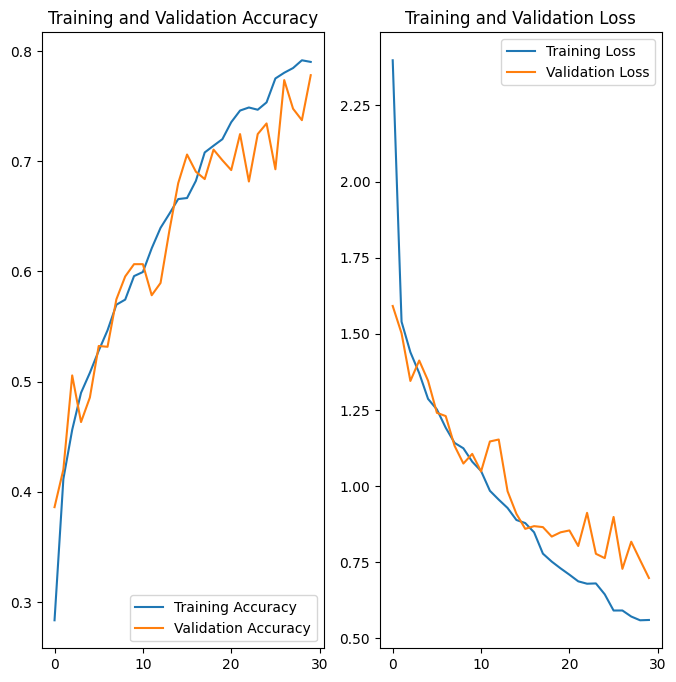

In [59]:
ViewModelMetrics(history)

#### **Todo:**  Analyze  results:  

* The training accuracy goes up steadily as we train the model over time. At the same time, the validation accuracy also increases during training.
* As we train for more epochs, the training loss goes down, and the validation loss also decreases.
* When we look at the plots, we see that the gap between training accuracy and validation accuracy has reduced significantly compared to the previous model.
* The model has achieved around 77% accuracy on the validation set.
* There's not much difference in accuracy between the training and validation data, which is a good sign.

#### Did you get rid of underfitting/overfitting?



> Yes, the accuracy and loss are now almost same on train and validation data



#### Did class rebalance help?



> Yes, class rebalance has helped in ridding overfitting. Infact it has also **increased the accuracy from 55 % to 77 %**

